## Continuous Optimization #4 

Optimize the function *F2: Shifted Schwefel’s Problem 2.21*. You should provide results for dimension D = 500.

In [1]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
# shifted Schwefel data points and parameters
schwefel = [-26.887898840676314, -4.909030414547971, -56.826025406333336, -95.043669605372287, -4.339775680348041, -50.297068853579887, -2.752898865611627, -84.856153410318896, -74.533727299197380, -60.380274391134833, -61.206290459641650, -53.791175480501437, -4.573086918505325, -28.685217420081315, -87.253767906961471, -56.484866459987629, -50.787415531483518, -42.895373315320263, -78.495780554835818, -76.628175663047614, -47.806205189207859, -78.919998647509843, -65.532600715783005, -55.289587342342600, -6.897855799616124, -31.464035736006807, -22.127974601406706, -71.862482795233930, -55.597405683680556, -47.013949932960600, -75.027270778909354, -72.129812677892261, -50.368718132053644, -62.994486643337716, -96.771792289111673, -81.605071364679617, -96.627656059385941, -53.336099708337407, -60.055514547545769, -63.201972140648927, -5.809143248129018, -72.122047819831934, -21.869078417727948, -48.631384842141514, -2.334503674599091, -82.185992144901746, -13.864164634798115, -68.074655088622507, -37.049684233999592, -83.464764021794423, -6.156487287437500, -47.898164964838585, -39.791921380439618, -29.856626527338435, -2.496362827275917, -48.405249673315588, -40.466287777080311, -95.298659099666835, -1.708597244445471, -45.798065923179898, -58.609439077616692, -92.382938503604393, -44.503419718878732, -16.835093736668583, -66.686540334491951, -76.668898998240138, -82.253432929598475, -3.454253003281806, -32.778883485785030, -83.301938848661109, -32.583349111227307, -53.134943186163298, -83.397863480491424, -79.509717686272339, -60.141336719217215, -21.132267194851323, -93.056279162798063, -62.182012024411307, -52.452708653474986, -54.658966169586378, -17.661199217955541, -45.082129001470925, -77.858957627185561, -12.243603259233510, -79.710686132409222, -2.686469670201816, -65.794989752215116, -50.450763416680985, -99.646027096690489, -62.491776792901554, -49.910548318740553, -48.158587577142200, -38.427901396125939, -24.612185882878151, -83.406884306125619, -98.211629420704853, -34.456776496985029, -29.035974195386444, -96.379961132298192, -84.063317314938615, -33.559125217521711, -93.593368688508974, -48.953764661494461, -20.305740978118990, -67.610465360713789, -75.647164428827622, -28.818734417711823, -82.190490404400265, -53.972485052838636, -11.085127643391601, -25.340833393861971, -8.941746573403961, -83.570944938333298, -30.490164347208633, -84.935039276049352, -1.870416522548751, -6.626159905229983, -23.072614668972449, -14.694322979375599, -63.247467157180552, -21.100332782764923, -15.203036134466316, -64.325470379810312, -98.191026594356245, -65.992483743110427, -46.138319765443413, -94.926376035386909, -94.162247878875775, -25.438258199066738, -33.549112091752662, -91.199206571743233, -90.390653822544820, -21.809256400663983, -13.365729615134725, -73.649054861561766, -31.855635356918455, -34.203279606513277, -95.139243968499045, -89.583829314957725, -2.610979374231050, -85.202048087849008, -7.762132164807753, -83.623589423452586, -82.124743399159300, -14.031385611121081, -4.001606740854641, -40.982359718074491, -96.829495100833029, -44.841456801298918, -19.469927125061758, -95.885466095878087, -61.717042846745670, -31.131541692001434, -8.770003299171591, -78.053344445728385, -68.617478309133688, -27.810696235960236, -14.004099627380270, -30.918898997963055, -23.100222914099405, -91.255672970227721, -75.387140421311670, -63.102227829512884, -44.305735421326119, -34.251042400751047, -18.066917346516007, -51.192225292308756, -90.685462338736215, -86.063072887373949, -4.818554282655512, -15.239776335464967, -46.036879511155838, -70.226708321217075, -58.010959736120277, -66.115910212219632, -93.642216049054753, -96.577248411931194, -34.858608732105907, -44.157846656650399, -73.259862095821887, -35.234616105875119, -50.425862540757919, -56.978723484351441, -8.550749347342588, -0.505133299888499, -29.025617494952087, -19.126477264395191, -11.526416473596797, -47.433476636887441, -55.378585942369583, -5.714040006797049, -43.240405335930191, -26.292229334900654, -25.049140828500938, -76.256933239403494, -65.773201534031813, -4.808010761000489, -19.061293413580131, -90.561987764307389, -40.115641242194442, -31.720872002384894, -26.223831927115100, -47.991704513743116, -44.781470047899049, -65.032296070595905, -95.198089735798817, -47.313481054939331, -11.605174339373377, -19.508004928750481, -8.615188484027044, -69.433854592469970, -76.232365235843588, -21.062545847727606, -71.253560502775656, -5.607693176666885, -32.537756879958238, -76.451794140435197, -88.878534937968567, -5.551195139190270, -45.437791296568385, -0.481670373365645, -52.959467596031260, -9.423620222974122, -78.285708766895965, -96.366944976407964, -75.707084062773589, -78.616238704205230, -63.978924560996461, -82.904845291766364, -52.116631301891651, -81.427284620788328, -9.613567127508006, -12.394724892334992, -29.853664126646350, -33.888746876269863, -49.134529636625437, -66.179340611964065, -44.748507473798803, -99.063832659073199, -51.117232765059690, -4.408589482207333, -60.598207826549675, -86.826956983334213, -50.089086172367473, -2.317503886038878, -8.663518556820577, -0.073722757004646, -35.684449008873230, -17.819479109435548, -10.968644944192192, -30.843401117909551, -58.581121508977262, -13.325516509251358, -75.304865925343165, -49.049405921655179, -77.534905666497139, -54.755816857442312, -14.572508016618130, -57.642383379003938, -88.926331296349616, -65.870287462215458, -17.277165995889249, -50.175389888038175, -24.225589972294557, -12.294632840827347, -77.148704482797129, -56.140189420123583, -72.262991177226127, -44.147664405703736, -63.409309646276085, -89.014705060523895, -44.854997547860243, -40.804255893230234, -18.935052948755995, -34.983433438987106, -99.676914977323634, -93.699802010173542, -55.341111383296912, -25.762532616216888, -18.031164130517325, -30.490809528451194, -40.613913220377462, -42.745473220513261, -61.581686550105488, -31.487999234534342, -74.622933581929885, -54.435086296679266, -47.964148113288218, -79.335763175176467, -95.771244979801025, -15.854621492308041, -47.453251451581870, -71.629007126218525, -73.991486358613244, -41.557976895268233, -71.924487604592713, -9.165648808281773, -65.380774217509114, -36.162095641143146, -90.668214351122401, -74.104067411968316, -7.666516349835419, -35.356733171647420, -60.063158066879382, -96.459293006422286, -63.585575223073477, -91.239676404520097, -48.018316455339672, -21.218471116175579, -57.561975810562295, -37.207398417115733, -79.302470532918903, -24.694829450519052, -91.061029766387804, -61.187358457458942, -80.009383535425357, -99.540483724267801, -66.703964200097488, -3.253438210809634, -61.240795903977755, -26.338372238733356, -44.583583816862280, -77.153692713113301, -10.140684235220860, -71.118635867513689, -82.120335758784634, -84.326288328272611, -18.192179819136868, -2.501742717010814, -62.295850288893703, -80.604550160430279, -54.678903260362219, -51.838114614738828, -27.335469233669770, -26.413250784930725, -16.374136215212246, -8.214239066578770, -2.061910298223395, -98.762545927930262, -85.754985279558340, -51.548265546630304, -81.919887861421287, -39.600944310708094, -50.717159417528201, -16.526889247084767, -84.432274509841676, -85.884683449432686, -6.538521589651140, -98.167148434166464, -55.823805405735747, -66.759798931275270, -3.799200111686545, -74.674811404693884, -91.738281965828719, -42.784369886457753, -36.404104564560861, -32.995891876163370, -36.620722597858489, -15.354634282882358, -67.258132226576691, -74.359163008587316, -48.127910328593650, -11.632954608156069, -30.495632423749981, -25.683653571222948, -94.071050656134318, -1.429909135218423, -72.173126822618372, -58.310991207457953, -97.925813594105762, -11.166574713776143, -61.074981708945572, -93.624862428757226, -10.925276696361877, -95.584863465342480, -43.993744468940235, -50.340599649105251, -8.916533541516372, -13.479073681317630, -94.789885154315641, -78.251390041031954, -94.116079538572379, -8.786935322662288, -18.548927212899159, -82.067343827380554, -47.731785110262280, -24.178472149965913, -6.417695219631497, -21.275359186927744, -41.675280435472061, -24.762114846419422, -54.482572184304971, -87.036304730847647, -73.480382950440315, -23.350602272550688, -49.776622893323498, -79.693933964241154, -99.905302955352710, -90.200792502154044, -2.737700932527758, -97.742635249235377, -46.823928642382505, -94.875784126671377, -19.425489922653966, -3.339659859167710, -56.098853261013602, -25.528723924761607, -50.506327784197019, -89.011782227307663, -93.422175998295828, -91.148030848800033, -70.292961439049748, -62.619930725596042, -94.848906480148102, -50.294748753452026, -67.590578429744525, -16.375482712522796, -58.462248564757466, -84.980906379302183, -55.880149646880007, -9.055403256577506, -69.245342002121163, -57.076128925938782, -77.858968046121575, -51.328260037466244, -13.430656467765516, -3.205431989479862, -69.827043310543218, -50.944188929280891, -61.700873475395589, -68.736035162608090, -20.184852809992677, -55.721034667147940, -35.015058691405244, -48.990218167477295, -83.516232230656797, -67.614223322391240, -2.488534995070410, -55.441759271102988, -0.494110301065646, -80.295791266071603, -18.106434346571959, -32.339986867951183, -25.758689729620571, -93.303101496561538, -14.509405528365576, -22.955491334137577, -50.040580919318529, -41.893206405748160, -70.314807954750975, -87.180519560675165, -34.830877235944129, -65.551327706606727, -94.721205834585007, -49.019099254833108, -47.750322472845717, -31.844452942389623, -27.438258356444379, -22.695762188691134, -12.068615294142120, -7.234972927341047, -46.287150845181891, -90.351510618373112, -59.269587519292202, -53.121114697488167, -24.259002358794106, -49.327989301448440, -71.706443593551484, -43.863780027794483, -15.437247208113945, -96.314268937351315, -12.139896125739057, -93.320964015493402, -5.927425569194199, -7.091613120436108, -34.467315637232034, -41.073976795357083, -55.960397417103401, -80.718041494002989, -90.029926676745930, -19.087789617927498, -44.841751427711550, -61.871923613240952, -20.948622739311276, -25.778861765864406, -96.342878165536092, -0.751582083290117, -49.604099151280856, -52.415094307040519, -83.144097031982938, -0.104451507799482, -16.806788787806582, -63.586543698019504, -76.515037511470027, -90.506771364902050, -93.102450444242820, -98.206299169279077, -39.573864264681589, -90.222051213879169, -24.688692145546952, -66.970649217094760, -61.908260017846544, -73.914339375400758, -19.583970616300135, -41.607071327175746, -11.761790943522570, -97.345986828207998, -70.857678678659340, -76.047243524241466, -12.077757638848411, -91.758867507887317, -92.656626969584309, -52.741592723151278, -12.020089043193920, -13.164574594540312, -71.130350589898370, -47.718001757871178, -82.847802929776876, -61.010359829036396, -95.155639123239297, -97.824369076773635, -52.192131065216763, -39.563123003089039, -92.207352741956257, -51.744130799450971, -34.183951578730870, -35.265173910795085, -12.884008959072858, -67.245590141006033, -43.962135592862296, -37.267319003732702, -91.495888330854825, -96.514859721665090, -65.952277731267543, -42.324757821486777, -38.139024445524107, -48.991006335380384, -67.984618578377294, -24.628607217456732, -18.059199787540081, -19.340079195207807, -54.046812718116591, -81.303706697191032, -62.302508914538528, -41.336551784887199, -94.512856224233559, -12.760697498076439, -6.115664414585524, -53.983377131453437, -58.265305979323109, -6.387536522204329, -84.020260567335299, -80.898294019059819, -67.822630183897616, -75.564849657429363, -93.042486183356644, -98.264363349997453, -55.216207862341037, -27.893393109949699, -28.890700638391550, -87.937790314492801, -7.295162862915888, -19.763655389077186, -52.235131982591433, -34.719312082957117, -27.805912818703916, -42.041561637535644, -51.021912172798096, -20.874393501257742, -62.296351359748542, -86.502251957750474, -11.385934818562021, -95.128314777778698, -86.155957920447790, -19.917299802351749, -33.073295452271608, -62.382888722566001, -40.738866958377315, -67.514678742550444, -84.733048695066273, -73.982198107590946, -76.838024028664307, -82.250592919307309, -2.472592805750025, -24.842697721556078, -31.802911672665317, -99.255935754802977, -21.225389225933654, -67.062851675343808, -88.979352423763089, -88.864316587824845, -32.248171080980143, -13.153330330482689, -20.459191715712194, -36.997309673085688, -86.403476070127411, -79.183895278397614, -74.978455974203328, -97.901359791168034, -35.444807287908702, -53.164323371060497, -75.124736496585882, -85.099946523292118, -66.803635701169881, -24.143916147150733, -87.470779018577275, -4.081402101002837, -33.252243438089380, -26.660882210934105, -67.421959316952822, -88.600645977433288, -82.173875773284891, -42.432932739060483, -85.757868425050262, -60.115084610859554, -1.174914164677347, -19.565537849080414, -83.184353509130631, -36.681078010628156, -80.576693644178178, -55.947228637460071, -21.770327263940501, -30.474385629870085, -1.387806095749411, -74.076556482039933, -87.449105314572762, -36.090395022799711, -3.079503605512471, -29.157867209060555, -25.911100651602851, -48.624863241834667, -70.374737853185735, -93.741956160645998, -99.511344208437052, -31.771873392879357, -0.815669640428553, -97.789665994403578, -90.407692761716021, -13.429647912183597, -3.712285548984838, -50.731976153758310, -43.237647044706570, -18.047861678951762, -16.371271093230732, -43.296177459838958, -98.151593899052571, -17.311103123008621, -21.230261998572900, -43.775724759043570, -67.444273545971129, -8.772455805952418, -48.259559426956258, -83.522459973783242, -33.091051266703587, -67.295387699118066, -91.854912112891029, -41.149438742259179, -68.880010217176434, -50.122992138114739, -63.568138978981160, -29.511036399701680, -61.705638207981195, -34.483879624166434, -34.310244393403238, -92.886359090732356, -86.017436502154709, -18.257790600960249, -11.727450200007354, -70.856283919842951, -61.318081546676595, -19.187214527474822, -11.808018926659884, -56.942225640989477, -49.447209652834076, -76.704727695830769, -43.029367349249839, -5.576530367180055, -63.741628363272334, -90.820927850289692, -18.252437566282893, -8.546636995108287, -22.591117813957922, -33.588294532597999, -24.391016488799906, -81.836588830037783, -58.513311719139814, -34.146515568353735, -73.302220452418368, -57.260297457086722, -22.705899278246505, -19.593609305371203, -58.520390942815752, -17.427955387367987, -68.262618158125235, -18.487946383187733, -88.450899992976659, -28.960897584606172, -20.223483430791134, -75.594965484413962, -10.302828352096370, -35.859854029775533, -0.114458960449653, -20.758213067184840, -22.268689434677583, -90.120876953337486, -79.103839945256183, -55.572708774287086, -53.910738029081067, -48.109585257447421, -96.142606311121014, -14.409835896798427, -2.864987497680460, -72.549489503752284, -22.688649833159303, -91.835485677347293, -87.014603409890086, -56.360999347821902, -25.591979330205646, -16.504322905860462, -13.291726002109371, -49.191391151525409, -85.568305610846906, -35.992422183983606, -13.501564434887243, -20.311369492678523, -12.200800976610992, -91.262436880879363, -52.409561775015284, -15.111183943305960, -90.399712278782999, -71.336597376565294, -19.198662904896338, -70.044058705842588, -13.041314884899364, -78.738802756519078, -99.064459225640491, -9.281720162198937, -96.408920289695800, -73.843356470550432, -98.157775675890690, -19.531485466395651, -94.550788654720165, -92.095561214900371, -53.107651192223713, -1.112526799114661, -11.432062372306262, -53.513380608814408, -61.615382787086546, -4.058494593965278, -72.556844729219392, -69.825403745019528, -54.040843122689601, -74.063175106658178, -35.997406794133937, -16.884008827705927, -54.958425801129692, -10.132793888965196, -2.851910901810697, -30.730343586919247, -21.178573417093375, -26.200808779238670, -70.375803282659163, -64.806867597264500, -47.792481006379248, -82.692790422461258, -3.320465219990623, -40.243116215019093, -52.465894118235376, -28.420576134356068, -74.506871507312439, -62.156108099233627, -60.656278747224782, -20.240727224225168, -46.758142931374501, -32.609776502667216, -91.534791238266180, -12.352179768807432, -59.879098745285297, -57.257439320708919, -81.168461978260567, -7.567343221086517, -30.223488000354450, -98.951437209418941, -48.757251579672392, -57.086611547191929, -84.524750248157787, -44.207125058082276, -58.694021526922427, -65.293323443978892, -7.159177762540196, -5.197654626583869, -10.336226265630415, -99.796688397764996, -87.161233347666752, -19.676616192130837, -89.861203690811692, -12.059006742013409, -15.864835518159865, -38.367162634717921, -68.387260631337725, -43.026728332249576, -22.145118438305616, -43.357754419313721, -80.321462716009620, -47.268810387324663, -43.966591838647396, -63.142056864124172, -71.086321117604442, -99.492336541086573, -20.831756778136537, -96.599964688810516, -89.822341616134082, -53.861003571603760, -41.896192274735235, -77.474939924330656, -12.429196381616833, -32.203065693260470, -86.993275381962661, -51.212910413908553, -50.731837895030665, -1.498365648364299, -86.858877364889977, -25.841779592247235, -86.348403849562231, -30.878594049861547, -79.591340742060609, -38.686983200626777, -91.310480202119379, -27.206598475950813, -24.069027876336264, -79.123021250306920, -3.726452989053342, -41.849767490329171, -30.262611580095225, -67.116433624400059, -83.176091354062081, -91.253234175289549, -84.259253336366442, -41.581286827630123, -16.283633022094108, -98.362249326982976, -58.924920560881532, -65.704455234783666, -6.723925741662512, -35.431989877983540, -53.033185909971237, -95.849043236063054, -70.320472214683051, -18.459739648064470, -75.329346373833914, -55.131091609532113, -41.381826851234017, -44.981281699002238, -2.995112467491296, -51.000285747828620, -23.456969214683056, -31.817144416379293, -77.431150865220133, -72.553914395332825, -28.207221684654911, -81.383494669634487, -7.298867326077470, -83.722962551286727, -10.016392283819471, -3.148133547729657, -25.984012106798858, -23.368490054245797, -1.309005878283500, -9.632740205021506, -36.344694199211361, -53.809565271023033, -37.134832148803454, -29.403844774435527, -32.079185190691661, -23.313962081202419, -16.844673671524006, -55.936982499598102, -74.782020047720891, -34.876994278510963, -92.125776649145052, -96.940785885423182, -74.621502030503109, -48.864415326612907, -4.492074404009429, -5.187803737545067, -53.105431579197251, -85.230368263872563, -15.561637832400763, -19.515674826950985, -83.928377294117439, -86.650871822472951, -70.682670794147526, -80.784186230288967, -25.875411843125477, -20.354494303790560, -60.645916754338714, -18.996483725457225, -48.905296228100411, -79.394848807082980, -28.140709223235220, -85.758449592881277, -52.711544799719967, -65.573955742070780, -42.604073839178938, -1.361899292932861, -23.901108154050149, -24.911348837357224, -69.211720464620527, -60.884124916533040, -70.719203911610904, -84.557462870084606, -68.284001709088301, -45.345113259409445, -85.000063456002948, -43.416397799136973, -86.329996957481043, -38.961649136250962, -54.895962339490403, -77.250683319383000, -76.165224618883059, -12.204755124632356, -44.796593372923752, -6.739686900003122, -35.660300616653288, -40.233099250277682, -97.063863391682460, -89.082109419391685, -95.009544361438316, -85.241633981660314, -2.779165236855661, -78.563040419012211, -65.606836206476430, -80.590303858265258, -88.218023860615986, -72.400460404264010, -84.140301811813970, -37.109775151317571, -4.708968863981653, -35.391491525804639, -86.162713546701042, -9.587897234576431, -96.412179814202361, -99.449005194371310, -31.993541946828771, -14.777340050699578, -28.362571629482304, -54.867766862454978, -62.649358988340801, -39.963912082124921, -41.214436478084814, -78.701799056163878, -64.235057840242064, -23.341337208713355, -1.544635398442537, -10.930436235151291, -41.556857365491318, -42.697453415504796, -31.647407174836019, -4.085319740582776, -82.938126839389824, -48.155647657233217, -52.701141807309504, -88.882509857250454, -24.886654796941372, -87.317368759414705, -87.351255511247246, -40.186502987209884, -2.798420043198917, -0.994382965327816, -23.492522286216442, -26.738872701271106, -23.941929446853976, -31.588797023945489, -86.402489965982937, -46.261707581248523, -16.574726909337201, -77.101081165917833, -14.240980510205461, -50.028198459057563, -21.132100252170773, -48.760650820034847, -26.525660014512027, -69.072848987907662, -42.710040106761546, -97.179359911620452, -66.059376662761252, -66.676434825697385, -42.473162911410419, -37.541997819450032, -12.129655886976693, -2.774143136474564, -37.656490958653656, -23.650232273348962, -93.002391362873212, -39.691961505191010, -98.807972881847263, -79.763799709635890, -53.062799907971680, -3.385410815888207, -99.956989643056701]

dimension = 500 
x_min = -100
x_max =  100
f_bias = -450

In [3]:
# shifted Schwefel function 
def schwefel_function(x_values, data=schwefel, dim=dimension, bias=f_bias):    
    F = abs(x_values[0] - data[0])
    for i in range(1, dimension):
        z = x_values[i] - data[i]
        F = max(F, abs(z))
    result = F + bias
    return result

In [4]:
# Particle Swarm Optimization 

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity 
    def update_velocity(self,pos_best_g):
        w=1       # constant inertia weight (how much to weigh the previous velocity) 0.4-1.4
        c1=2        # cognative constant 1.5-2
        c2=2        # social constant 2-2.5

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
def PSO(costFunc,x0,bounds,num_particles,maxiter):
    global num_dimensions

    num_dimensions=len(x0)
    err_best_g=-1                   # best error for group
    pos_best_g=[]                   # best position for group
    err_log = np.empty((0,1))                      # best position for group    

    # establish the swarm
    swarm=[]
    for i in range(0,num_particles):
        swarm.append(Particle(x0))

    # begin optimization loop
    i=0
    while i < maxiter:
        #print i,err_best_g
        # cycle through particles in swarm and evaluate fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunc)

            # determine if current particle is the best (globally)
            if swarm[j].err_i < err_best_g or err_best_g == -1:
                pos_best_g=list(swarm[j].position_i)
                err_best_g=float(swarm[j].err_i)

        # cycle through swarm and update velocities and position
        for j in range(0,num_particles):
            swarm[j].update_velocity(pos_best_g)
            swarm[j].update_position(bounds)     
        err_log = np.vstack((err_log, err_best_g)) 
        i+=1
    
    return pos_best_g, err_best_g, err_log 

In [5]:
start = timer()
initial = np.random.uniform(x_min, x_max, dimension)             # random starting point
bounds = [(x_min, x_max) for x in range(dimension)]             # function bounds
solution = PSO(schwefel_function,initial,bounds,num_particles=15,maxiter=30)
end = timer()
elapsed_time = end - start

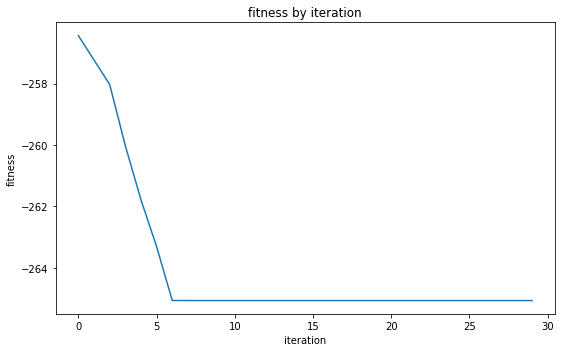

In [6]:
## create plot

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

_ = plt.plot(solution[2])
_ = plt.title('fitness by iteration')
_ = plt.xlabel('iteration')
_ = plt.ylabel('fitness')

plt.tight_layout()
plt.show()

In [7]:
## results 

print('RESULTS')
print('Best solution: ', solution[0])
print('Fitness of the best solution: ', solution[1])
print('Computation time (seconds): ', elapsed_time)

RESULTS
Best solution:  [-38.2597794073577, 69.94464248931965, 100, -28.250679226722912, -12.39766056289759, -67.39328394600716, -91.50395707176736, 41.958932176107005, -79.29364732295608, 40.45029369328735, 63.06681385837114, -9.185029251111267, 81.33069814220127, 17.083387050423788, 15.942999382679846, -60.14683739268249, -52.62055530921116, -6.316730892591, -99.67284897600214, 56.13116220576906, -46.89988553652635, -0.8935498765011152, -33.22993621238776, 16.16463835576426, -28.180947889813915, 40.06331810992992, -12.187196164281696, 65.27516469986926, -29.12618491867821, -16.306364898769374, -38.149481900965014, 67.30439130930412, -57.47020169013334, -39.456383125772554, 22.92996515877873, -54.9593638123088, 85.50156810971852, 51.569894230674194, 4.603674504460373, -11.720728288745988, -31.958926121685618, -21.046121254720948, 17.560551322686976, -56.23304496600789, -34.775821839770785, -46.069807238749775, 18.909685433322483, 46.50362282747061, -25.898803309856262, -58.52481427214

Please see Conclusion and Notes in Dim 50 version